In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import math

In [9]:
data = pd.read_csv('iris.csv')
print(data.head())
# data.isnull()

     A    B            C
0  1.4  0.2  Iris-setosa
1  1.4  0.2  Iris-setosa
2  1.3  0.2  Iris-setosa
3  1.5  0.2  Iris-setosa
4  1.4  0.2  Iris-setosa


In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data['C'] = encoder.fit_transform(data['C'])

print(data.head())

     A    B  C
0  1.4  0.2  0
1  1.4  0.2  0
2  1.3  0.2  0
3  1.5  0.2  0
4  1.4  0.2  0


In [12]:
data['C'].unique()

array([0, 1, 2])

In [13]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1:].values

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [15]:
classifier = LogisticRegression(max_iter=1000, multi_class='ovr')

classifier.fit(X_train, y_train)

C:\Users\sabih\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000, multi_class='ovr')

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = classifier.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classifier.coef_, classifier.intercept_)

print(confusion_matrix(y_test, y_pred))

0.9210526315789473
[[-2.43045746 -0.97133037]
 [ 0.7067762  -1.21690236]
 [ 2.51581801  2.08268811]] [  7.36340111  -2.07768998 -15.53801145]
[[13  0  0]
 [ 1 13  2]
 [ 0  0  9]]


iterations: 0 || cost: 2.079435541685836
iterations: 1000 || cost: -2.999998499754201e-06
iterations: 2000 || cost: -2.999998499754201e-06
iterations: 3000 || cost: -2.999998499754201e-06
iterations: 4000 || cost: -2.999998499754201e-06
iterations: 5000 || cost: -2.999998499754201e-06
iterations: 6000 || cost: -2.999998499754201e-06
iterations: 7000 || cost: -2.999998499754201e-06
iterations: 8000 || cost: -2.999998499754201e-06
iterations: 9000 || cost: -2.999998499754201e-06


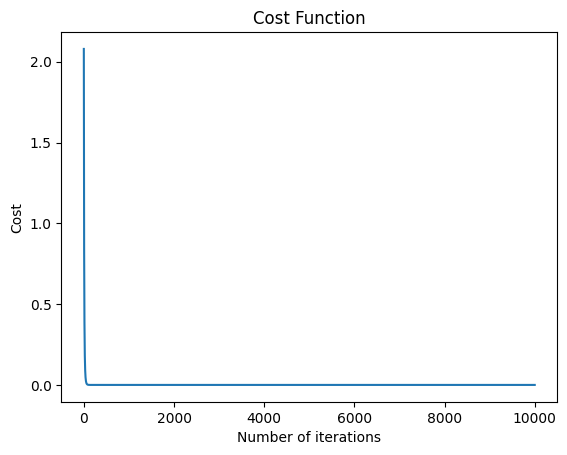

In [17]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def multiclass_logistic_regression(X, y, num_classes, num_iterations, alpha):
    m, n = X.shape
    theta = np.zeros((n, num_classes))

    cost_history = []

    for i in range(num_iterations):
        z = np.dot(X, theta)
        h = sigmoid(z)
        cost = (-1/m) * np.sum(y*np.log(h + 1e-6))
        cost_history.append(cost)
        gradients = (1/m) * np.dot(X.T, (h-y))
        theta = theta - alpha * gradients

        if i % 1000 == 0:
            print('iterations:', i, '||', 'cost:', cost)

    plt.plot(range(len(cost_history)), cost_history)
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost')
    plt.title('Cost Function')
    plt.show()
    

multiclass_logistic_regression(X,y,3,10000,0.01)

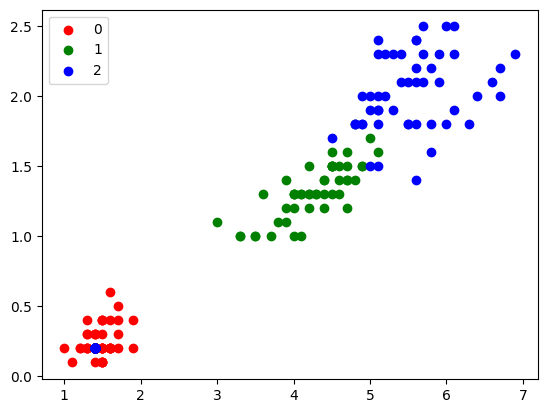

In [19]:
zero = np.where(y==0)
one = np.where(y==1)
two = np.where(y==2)

plt.scatter(X[zero, 0], X[zero, 1], c='r', label='0')
plt.scatter(X[one, 0], X[one, 1], c='g', label='1')
plt.scatter(X[two, 0], X[two, 1], c='b', label='2')
plt.legend(loc='upper left')


In [25]:
h = 0.01
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X_mesh = np.c_[xx.ravel(), yy.ravel()]
Z = classifier.predict(X_mesh)

In [44]:
print(xx.shape, yy.shape)
print(xx.ravel().shape, yy.ravel().shape)

(340, 690) (340, 690)
(234600,) (234600,)


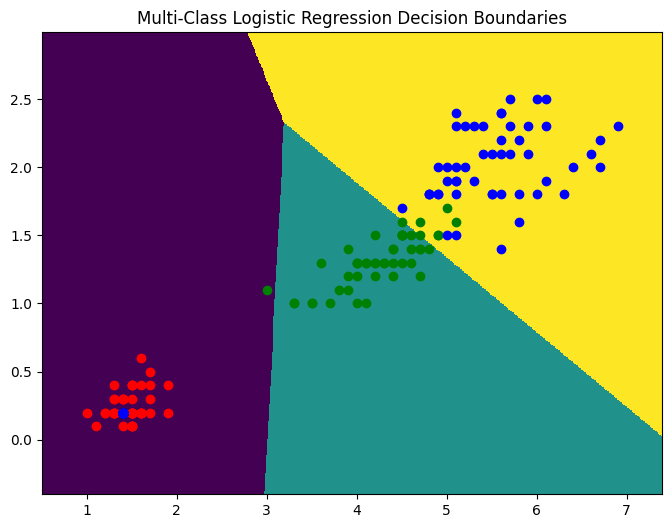

In [42]:
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8,6))
plt.pcolormesh(xx, yy, Z)

# Plot also the training points
plt.scatter(X[zero, 0], X[zero, 1], c='r', label='0')
plt.scatter(X[one, 0], X[one, 1], c='g', label='1')
plt.scatter(X[two, 0], X[two, 1], c='b', label='2')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
# plt.xticks(())
# plt.yticks(())
plt.title('Multi-Class Logistic Regression Decision Boundaries')

plt.show()